In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from insightface.app import FaceAnalysis

##### Inference

In [ ]:
app = FaceAnalysis(name="buffalo_s", providers=['CUDAExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

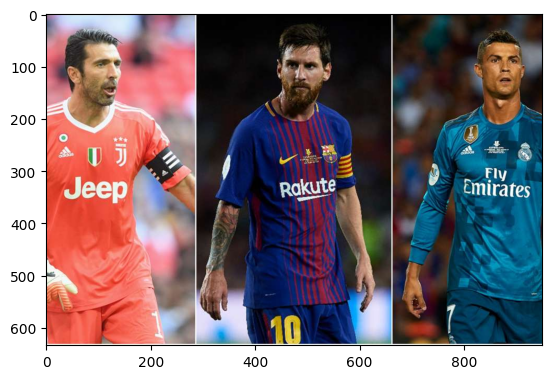

In [23]:
input_image = cv2.imread("input/image.jpg")
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)

In [13]:
results = app.get(input_image)
results

[{'bbox': array([834.82526 ,  56.242157, 911.81006 , 157.5853  ], dtype=float32),
  'kps': array([[860.771   ,  92.829254],
         [895.5607  ,  91.74722 ],
         [883.8365  , 105.60558 ],
         [867.6579  , 131.86609 ],
         [894.454   , 130.92174 ]], dtype=float32),
  'det_score': np.float32(0.8708653),
  'landmark_3d_68': array([[ 8.30767334e+02,  9.47503662e+01,  4.86068954e+01],
         [ 8.32739746e+02,  1.05925285e+02,  4.63319016e+01],
         [ 8.34987183e+02,  1.17520805e+02,  4.30173759e+01],
         [ 8.37973267e+02,  1.28592102e+02,  3.81509056e+01],
         [ 8.42970642e+02,  1.38410934e+02,  2.93115177e+01],
         [ 8.49403992e+02,  1.45680756e+02,  2.18797550e+01],
         [ 8.56835449e+02,  1.50659592e+02,  1.58272772e+01],
         [ 8.65955139e+02,  1.53728546e+02,  8.66791916e+00],
         [ 8.78830139e+02,  1.56577881e+02,  6.86774397e+00],
         [ 8.90290710e+02,  1.54825867e+02,  1.40063639e+01],
         [ 8.97487732e+02,  1.51599792e+02,

In [5]:
len(results)

3

In [10]:
face_bank = np.load("face_bank.npy", allow_pickle=True)

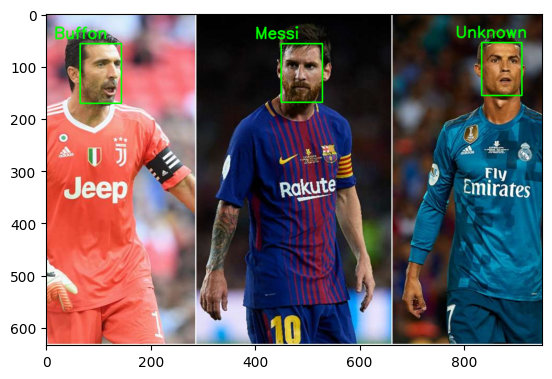

In [27]:
threshold = 25

result_image = input_image.copy()

for result in results:
    cv2.rectangle(result_image, (int(result.bbox[0]), int(result.bbox[1])), (int(result.bbox[2]), int(result.bbox[3])), 
                  (0, 255, 0), 2)
    
    for person in face_bank:
        face_bank_person_embedding = person["embedding"]
        new_person_embedding = result["embedding"]
        distance = np.sqrt(np.sum((face_bank_person_embedding - new_person_embedding)**2))
        if distance < threshold:
            cv2.putText(result_image, person["name"], (int(result.bbox[0])-50, int(result.bbox[1])-10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=1, 
                        color=(0, 255, 0), 
                        thickness=2, 
                        lineType=cv2.LINE_AA)
            break
    else:
        cv2.putText(result_image, "Unknown", (int(result.bbox[0])-50, int(result.bbox[1])-10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=1, 
                        color=(0, 255, 0), 
                        thickness=2, 
                        lineType=cv2.LINE_AA)
    
plt.imshow(result_image)